In [292]:
# https://www.berlin.de/polizei/aufgaben/verkehrssicherheit/verkehrsunfallstatistik/

In [1]:
import pandas as pd
import tabula
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
def create_month_col(m:[str]=None, y:[str]="2020"):
    if len(str(m)) == 1:
        return str(y)+"_0"+str(m)
    else:
        return str(y)+"_"+str(m)

In [38]:
data_20

,month,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,total_acc_w_injury,alcohol_related,daylight,dark,dusk,dry,wet,icy
0,2020_01,274,738,181,75,37,107,712,141,9,862,70,417,358,87,494,362,6
1,2020_02,249,661,153,78,32,118,670,116,7,793,96,441,297,55,405,387,1
2,2020_03,247,539,83,98,26,89,552,111,2,665,87,490,137,38,496,169,0
3,2020_04,355,597,66,130,20,83,632,111,2,745,64,670,55,20,706,39,0
4,2020_05,394,696,93,154,29,99,754,139,4,897,98,803,58,36,771,126,0
5,2020_06,654,958,105,191,31,163,1068,176,4,1248,87,1148,64,36,1108,140,0
6,2020_07,570,843,105,182,29,154,954,170,4,1128,113,996,97,35,951,176,1
7,2020_08,670,1083,123,277,41,172,1191,211,5,1407,121,1221,128,58,1213,194,0
8,2020_09,625,1071,129,226,36,174,1131,208,1,1340,133,1096,167,77,1193,147,0
9,2020_10,499,978,139,205,35,151,1057,159,4,1220,122,816,286,118,684,536,0


### Loading cleaned dataset and create a new csv file per year, grouped by month

In [3]:
data_ = pd.read_csv("./data/cleaned_data.csv")

#### 2018

In [4]:
data_18 = data_[data_.ujahr == 2018]

+ dropping columns not needed for accumulation

In [5]:
data_18 = data_18[['umonat', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 
                   'street_condition', 'light_condition','accident_outcome']]

##### Creating new columns one and zero to use data when aggregating groupby month
+ accident outcome

In [6]:
for o in ["slightly_injured", "seriously_injured", "killed"]:
    data_18[o] = list(map(lambda x: 1 if x == o else 0, data_18.accident_outcome))
data_18.drop(["accident_outcome"], axis=1, inplace=True)

+ street surface condition

In [7]:
for s in ['dry', 'wet', 'icy']:
    data_18[s] = list(map(lambda x: 1 if x == s else 0, data_18.street_condition))
data_18.drop(["street_condition"], axis=1, inplace=True)

+ lighting condition

In [8]:
for l in ['daylight', 'dark', 'dusk']:
    data_18[l] = list(map(lambda x: 1 if x == l else 0, data_18.light_condition))
data_18.drop(["light_condition"], axis=1, inplace=True)

In [9]:
data_18 = data_18.groupby("umonat").agg(sum)

In [10]:
# create total_acc_w_injury column
data_18["total_acc_w_injury"] = data_18.slightly_injured + data_18.seriously_injured + data_18.killed

In [11]:
# create year_month column
data_18["month"] = list(map(create_month_col, data_18.index))
data_18.reset_index(level=0, inplace=True)
data_18.drop(["umonat"], axis=1, inplace=True)
data_18

,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,dry,wet,icy,daylight,dark,dusk,total_acc_w_injury,month
0,245,758,247,50,28,129,720,161,3,358,509,17,388,401,95,884,2018_01
1,201,640,153,39,30,101,608,119,3,602,107,21,447,235,48,730,2018_02
2,222,700,154,65,27,110,691,109,2,516,265,21,566,190,46,802,2018_03
3,453,1008,148,214,38,168,1011,202,4,1067,150,0,1051,123,43,1217,2018_04
4,679,1174,190,257,62,184,1199,261,2,1424,38,0,1315,96,51,1462,2018_05
5,647,1153,177,289,46,183,1251,212,3,1370,96,0,1342,88,36,1466,2018_06
6,547,987,125,241,41,162,1054,179,3,1163,73,0,1097,104,35,1236,2018_07
7,553,1017,135,274,32,179,1085,223,4,1248,64,0,1144,117,51,1312,2018_08
8,572,1027,150,292,42,148,1100,223,5,1194,134,0,1073,179,76,1328,2018_09
9,448,1037,176,225,42,177,1059,186,3,999,249,0,867,254,127,1248,2018_10


In [12]:
tables = tabula.read_pdf("./pdfs/alkohol2018.pdf", pages = "all", multiple_tables = True)

In [13]:
dui_2018 = list(tables[3].iloc[0])
dui_2018

['Anzahl',
 '89',
 '100',
 '108',
 '101 132',
 '106',
 '124',
 '106',
 '117',
 '96',
 nan,
 118.0,
 137.0,
 1334.0]

In [14]:
# cleanup and add column
dui_2018_ = dui_2018[1:-1]
dui_2018_[3] = "101"
dui_2018_.insert(4, "132")
del(dui_2018_[10])
data_18["alcohol_related"] = [int(_) for _ in dui_2018_]

In [15]:
# reorder columns
data_18 = data_18[['month', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 'slightly_injured',
                   'seriously_injured', 'killed', 'total_acc_w_injury', 'alcohol_related', 'daylight', 'dark', 'dusk', 
                   'dry', 'wet', 'icy']]

#### 2019

In [26]:
data_19 = data_[data_.ujahr == 2019]

data_19 = data_19[['umonat', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 
                   'street_condition', 'light_condition','accident_outcome']]

# injuries
for o in ["slightly_injured", "seriously_injured", "killed"]:
    data_19[o] = list(map(lambda x: 1 if x == o else 0, data_19.accident_outcome))
data_19.drop(["accident_outcome"], axis=1, inplace=True)

# street surface
for s in ['dry', 'wet', 'icy']:
    data_19[s] = list(map(lambda x: 1 if x == s else 0, data_19.street_condition))
data_19.drop(["street_condition"], axis=1, inplace=True)

# lighting condition
for l in ['daylight', 'dark', 'dusk']:
    data_19[l] = list(map(lambda x: 1 if x == l else 0, data_19.light_condition))
data_19.drop(["light_condition"], axis=1, inplace=True)

data_19 = data_19.groupby("umonat").agg(sum)

In [27]:
# create total_acc_w_injury column
data_19["total_acc_w_injury"] = data_19.slightly_injured + data_19.seriously_injured + data_19.killed

In [28]:
# create year_month column
data_19["month"] = list(map(create_month_col, data_19.index))
data_19.reset_index(level=0, inplace=True)
data_19.drop(["umonat"], axis=1, inplace=True)
# data_19

In [29]:
tables = tabula.read_pdf("./pdfs/alkohol2019.pdf", pages = "all", multiple_tables = True)

dui_2019 = list(tables[2].iloc[0])
dui_2019

# cleanup and add column
dui_2019_ = dui_2019[1:-1]
dui_2019_[3] = "96"
dui_2019_.insert(4, "107")
del(dui_2019_[10])
data_19["alcohol_related"] = [int(_) for _ in dui_2019_]

In [30]:
# reorder columns
data_19 = data_19[['month', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 'slightly_injured',
                   'seriously_injured', 'killed', 'total_acc_w_injury', 'alcohol_related', 'daylight', 'dark', 'dusk', 
                   'dry', 'wet', 'icy']]

#### 2020

In [33]:
data_20 = data_[data_.ujahr == 2020]

data_20 = data_20[['umonat', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 
                   'street_condition', 'light_condition','accident_outcome']]

# injuries
for o in ["slightly_injured", "seriously_injured", "killed"]:
    data_20[o] = list(map(lambda x: 1 if x == o else 0, data_20.accident_outcome))
data_20.drop(["accident_outcome"], axis=1, inplace=True)

# street surface
for s in ['dry', 'wet', 'icy']:
    data_20[s] = list(map(lambda x: 1 if x == s else 0, data_20.street_condition))
data_20.drop(["street_condition"], axis=1, inplace=True)

# lighting condition
for l in ['daylight', 'dark', 'dusk']:
    data_20[l] = list(map(lambda x: 1 if x == l else 0, data_20.light_condition))
data_20.drop(["light_condition"], axis=1, inplace=True)


data_20 = data_20.groupby("umonat").agg(sum)


In [34]:
# create total_acc_w_injury column
data_20["total_acc_w_injury"] = data_20.slightly_injured + data_20.seriously_injured + data_20.killed

In [35]:
# create year_month column
data_20["month"] = list(map(create_month_col, data_20.index))
data_20.reset_index(level=0, inplace=True)
data_20.drop(["umonat"], axis=1, inplace=True)
data_20

,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,dry,wet,icy,daylight,dark,dusk,total_acc_w_injury,month
0,274,738,181,75,37,107,712,141,9,494,362,6,417,358,87,862,2020_01
1,249,661,153,78,32,118,670,116,7,405,387,1,441,297,55,793,2020_02
2,247,539,83,98,26,89,552,111,2,496,169,0,490,137,38,665,2020_03
3,355,597,66,130,20,83,632,111,2,706,39,0,670,55,20,745,2020_04
4,394,696,93,154,29,99,754,139,4,771,126,0,803,58,36,897,2020_05
5,654,958,105,191,31,163,1068,176,4,1108,140,0,1148,64,36,1248,2020_06
6,570,843,105,182,29,154,954,170,4,951,176,1,996,97,35,1128,2020_07
7,670,1083,123,277,41,172,1191,211,5,1213,194,0,1221,128,58,1407,2020_08
8,625,1071,129,226,36,174,1131,208,1,1193,147,0,1096,167,77,1340,2020_09
9,499,978,139,205,35,151,1057,159,4,684,536,0,816,286,118,1220,2020_10


In [36]:

tables = tabula.read_pdf("./pdfs/alkohol2020.pdf", pages = "all", multiple_tables = True)

dui_2020 = list(tables[2].iloc[0])
dui_2020

# cleanup and add column
dui_2020_ = dui_2020[1:-1]
dui_2020_[3] = "64"
dui_2020_.insert(4, "98")
del(dui_2020_[10])
data_20["alcohol_related"] = [int(_) for _ in dui_2020_]

In [37]:
# reorder columns
data_20 = data_20[['month', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz', 'ist_sonstige', 'slightly_injured',
                   'seriously_injured', 'killed', 'total_acc_w_injury', 'alcohol_related', 'daylight', 'dark', 'dusk', 
                   'dry', 'wet', 'icy']]

In [318]:
#data_20

#### Concatenate all three datasets

In [39]:
data_complete = pd.concat([data_18, data_19, data_20], axis = 0)

In [40]:
data_complete.reset_index(drop=True)
data_complete["month_num"] = list(map(lambda x: int(x.replace("_", "")), data_complete.month))

In [41]:
# save as csv
data_complete.to_csv("./data/monthly_incl_alc.csv", index=False)

In [42]:
data_complete

,month,ist_rad,ist_pkw,ist_fuss,ist_krad,ist_gkfz,ist_sonstige,slightly_injured,seriously_injured,killed,total_acc_w_injury,alcohol_related,daylight,dark,dusk,dry,wet,icy,month_num
0,2018_01,245,758,247,50,28,129,720,161,3,884,89,388,401,95,358,509,17,201801
1,2018_02,201,640,153,39,30,101,608,119,3,730,100,447,235,48,602,107,21,201802
2,2018_03,222,700,154,65,27,110,691,109,2,802,108,566,190,46,516,265,21,201803
3,2018_04,453,1008,148,214,38,168,1011,202,4,1217,101,1051,123,43,1067,150,0,201804
4,2018_05,679,1174,190,257,62,184,1199,261,2,1462,132,1315,96,51,1424,38,0,201805
5,2018_06,647,1153,177,289,46,183,1251,212,3,1466,106,1342,88,36,1370,96,0,201806
6,2018_07,547,987,125,241,41,162,1054,179,3,1236,124,1097,104,35,1163,73,0,201807
7,2018_08,553,1017,135,274,32,179,1085,223,4,1312,106,1144,117,51,1248,64,0,201808
8,2018_09,572,1027,150,292,42,148,1100,223,5,1328,117,1073,179,76,1194,134,0,201809
9,2018_10,448,1037,176,225,42,177,1059,186,3,1248,96,867,254,127,999,249,0,201810


In [334]:
data_complete.columns

Index(['month', 'ist_rad', 'ist_pkw', 'ist_fuss', 'ist_krad', 'ist_gkfz',
       'ist_sonstige', 'slightly_injured', 'seriously_injured', 'killed',
       'total_acc_w_injury', 'alcohol_related', 'daylight', 'dark', 'dusk',
       'dry', 'wet', 'icy', 'month_num'],
      dtype='object')

In [335]:
data_complete.rename(columns={'ist_rad': 'bicycle', 'ist_pkw': 'car', 'ist_fuss': 'pedestrian', 'ist_krad': 'motorbike',
                              'ist_gkfz': 'truck', 'ist_sonstige': 'other'}, inplace=True)

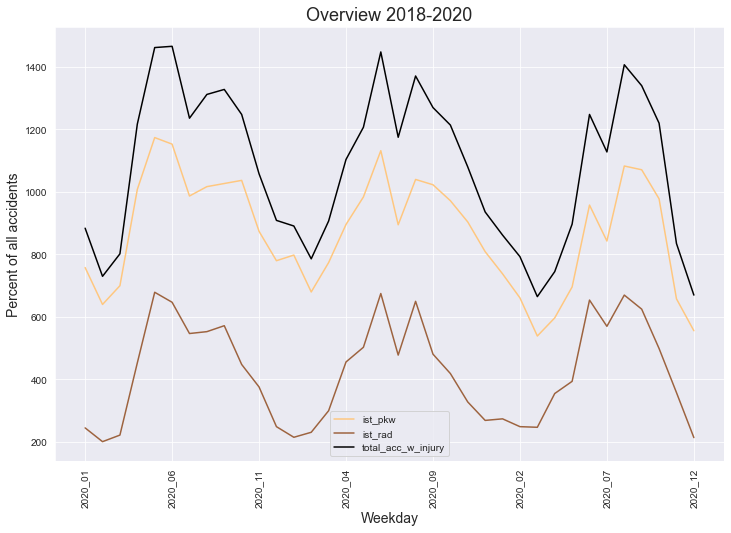

In [329]:
sns.set_style('darkgrid')
data_complete.plot(x="month", y=["ist_pkw", "ist_rad", "total_acc_w_injury"], kind="line", figsize=(12,8), colormap="copper_r")
plt.title("Overview 2018-2020", fontsize=18)
plt.xlabel("Month", fontsize=14)
plt.xticks(rotation=90)
#plt.xticks(np.arange(min(complete_data.month_num"), max("monthmum"), 1.0))
plt.ylabel("Percent of all accidents", fontsize=14)

plt.show()

The times of the hard lockdowns (starting in March and November of 2020) showed a lower number of accidents with injuries, moreover in the first lockdown (spring on 2020) the accidents with cyclists rose, which supports the theory that more people where using the bike instead of public transport.

In [333]:
sum(data_20.killed)

45

In [331]:
len(data_[data_.ujahr == 2019])

13389

In [69]:
# show pdf table contents
for _ in range(len(tables)):
    print(" ***",_,"***")
    print(tables[_])
    print("_____________________________________________")

 *** 0 ***
       Unfallkategorien       1                 2                 3  \
0                   NaN     NaN               NaN               NaN   
1                   NaN  VU mit            VU mit            VU mit   
2      Unfallkategorien     NaN               NaN               NaN   
3                   NaN   Toten  Schwerverletzten  Leichtverletzten   
4                   NaN     NaN               NaN               NaN   
5    Anzahl - insgesamt       1               122               326   
6   darunter § 142 StGB       0                 9                48   
7  Anteil an  Kategorie   0,00%             7,38%            14,72%   

                 4                  6 Unnamed: 0  
0           VU mit   VU mit sonstigem        NaN  
1              NaN                NaN        NaN  
2  schwerwiegendem  Sachschaden unter  Insgesamt  
3              NaN                NaN        NaN  
4      Sachschaden  Alkoholeinwirkung        NaN  
5              150                574      

[64 rows x 4 columns]
_____________________________________________
 *** 59 ***
   AHnzäauhfli -g Pkreoimtsilvle rteilung                       Unnamed: 0  \
0                                     NaN                              NaN   
1                    Pol.Abschnitt Bezirk                              Ort   
2                                   52 KB                     KATZBACHSTR.   
3                                     NaN                      NOSTITZSTR.   
4                                     NaN                         PLANUFER   
..                                    ...                              ...   
59                                    NaN                      RICHARDSTR.   
60                                    NaN  RICHARDSTR. / SCHÖNEWEIDER STR.   
61                                    NaN            SAALESTR. / SAALESTR.   
62                                    NaN                      SIEVERSUFER   
63                                    NaN                     